In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Dataset1.csv')

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Descriptive analysis

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines."  <br>
## Identify the top cuisines and cities with the highest number of restaurants.

In [24]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [30]:
# Explore unique values in each categorical column
print("Unique values in 'Country Code':", df['Country Code'].nunique())
print("Unique values in 'City':", df['City'].nunique())
print("Unique values in 'Cuisines':", df['Cuisines'].nunique())

Unique values in 'Country Code': 15
Unique values in 'City': 141
Unique values in 'Cuisines': 1825


In [34]:
### Country Code Distribution
# Counts how often each unique value appears in the column
country_distribution = df['Country Code'].value_counts()
country_distribution 

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

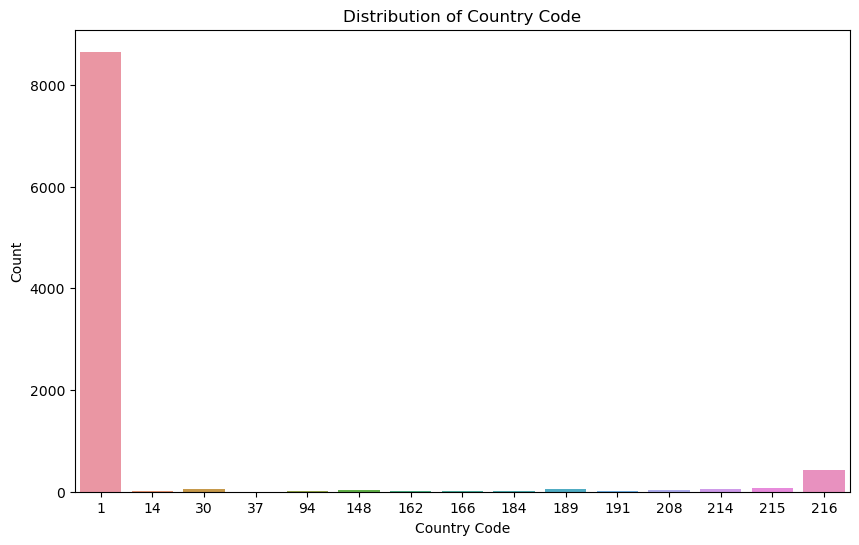

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values)
plt.title('Distribution of Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.show()

<span style="color:blue; font-size:20px;"> Country code with '1' has the highest number of restaurant and '34'has minimum.</span>


In [45]:
city_distribution = df['City'].value_counts()
city_distribution

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

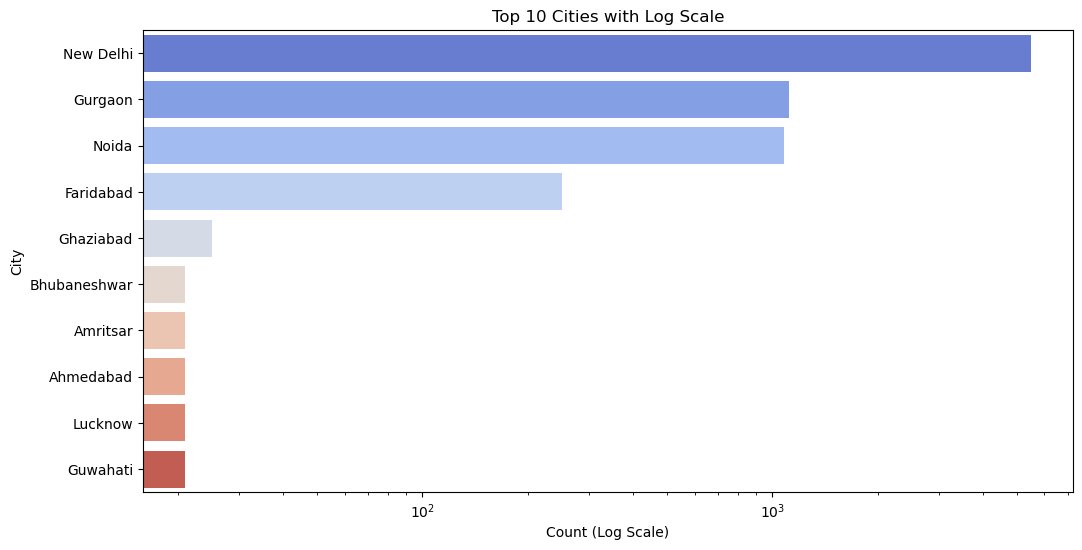

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10], palette='coolwarm')
plt.xscale('log')  # Logarithmic scale
plt.title('Top 10 Cities with Log Scale')
plt.xlabel('Count (Log Scale)')
plt.ylabel('City')
plt.show()

<span style="color:blue; font-size:20px "> New delhi has the highest number of restaurants.</span>

In [72]:
Cuisines_distribution = df['Cuisines'].value_counts()
Cuisines_distribution

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

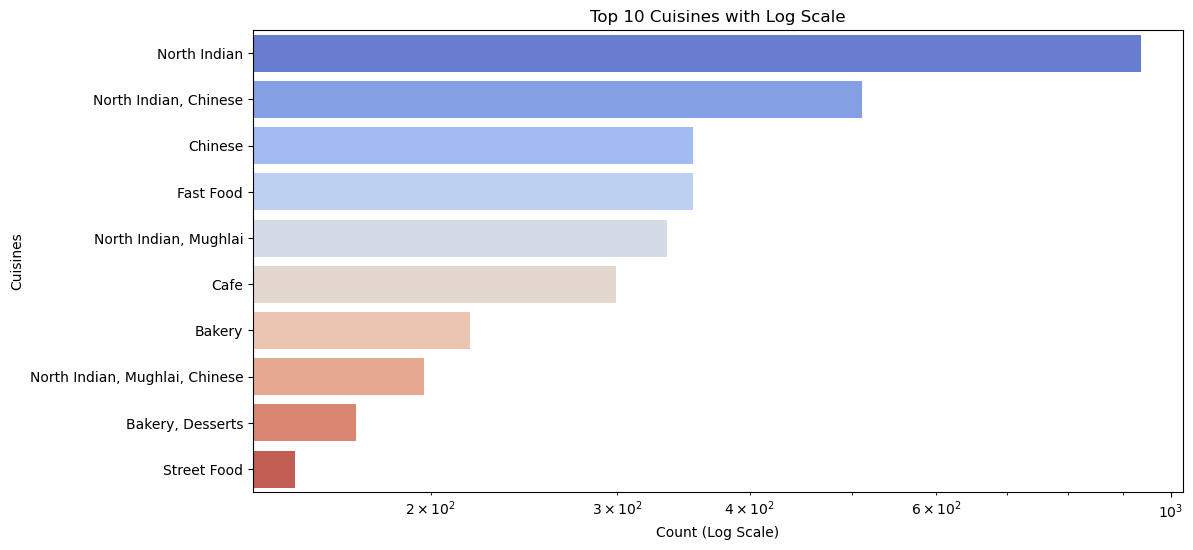

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Cuisines', data=df, order=df['Cuisines'].value_counts().index[:10], palette='coolwarm')
plt.xscale('log')  # Logarithmic scale
plt.title('Top 10 Cuisines with Log Scale')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Cuisines')
plt.show()

<span style="color:blue; font-size:20px "> North Indian cuisines have the highest number of cuisines.</span>